# Project: Investigate Movie Data(1960-2015)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>For ths project, I picked the TMDB movie data for my analysis, which contains 10000 movies with information regarding the filming infomation and performance.
> 
> **My Questions:**<br>
><li>Which genre is the most profitable?</li><br><li>Does higher rating means higher profit?</li><br><li>Find trends of the movie industry over time.</li><br><li>Compare movies with top budget with top revenue.</li>

In [109]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load my sheet, get an overview of the data to prepare for the cleaning. This will also let you become familar with each columns of this dataset.

### General Properties

In [110]:
# load data csv named tmdb-movies in the folder
df=pd.read_csv('tmdb-movies.csv')

# get a view of the first five rows
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [111]:
# get general information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Observations

<li>Popularity does not reflect the actual views for the movies in the early time. </li>


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [112]:
# drop data that will not be used
df.drop(['imdb_id', 'popularity', 'homepage', 'keywords', 'overview', 'id','tagline','release_date', 'vote_count'],axis=1, inplace=True)
# get a view of the first five rows
df.head(5)

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09


In [113]:
# use info to find nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                10866 non-null  int64  
 1   revenue               10866 non-null  int64  
 2   original_title        10866 non-null  object 
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget_adj            10866 non-null  float64
 11  revenue_adj           10866 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1018.8+ KB


In [114]:
# drop no value data
df.dropna(inplace=True)

# also drop duplicate
df.drop_duplicates(inplace=True)

# for the purpose of calucation, drop data equals to zero - which do not make any sense
df=df[df!=0].dropna()



In [115]:
# check for duplicates
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
10822    False
10828    False
10829    False
10835    False
10848    False
Length: 3805, dtype: bool>

In [116]:
# check for no value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3805 non-null   float64
 1   revenue               3805 non-null   float64
 2   original_title        3805 non-null   object 
 3   cast                  3805 non-null   object 
 4   director              3805 non-null   object 
 5   runtime               3805 non-null   float64
 6   genres                3805 non-null   object 
 7   production_companies  3805 non-null   object 
 8   vote_average          3805 non-null   float64
 9   release_year          3805 non-null   int64  
 10  budget_adj            3805 non-null   float64
 11  revenue_adj           3805 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 386.4+ KB


>Now there are no missing data, zeros, and duplicate data in the sheet.


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genre is the most profitable over time?)

>I will sort out every genre in the dataset and calculate the average earning comparing to the budget. 

>**Profitability:** This is measures by the defined ROI, which stands for earning for the budget in our case.<br>**Roi:** This is the profit(adjusted revenue - adjusted budget) devided by budget.

In [117]:
# add a column named roi to the dataframe
df['roi'] =(df.revenue_adj/df.budget_adj) -1
# get a view of roi data
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,roi
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,9.090192
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,1.522909
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08,1.683984
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09,9.340891
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09,6.927628


In [118]:
# inspect the roi using describe
df.roi.describe()

count    3.805000e+03
mean     3.008519e+02
std      1.654808e+04
min     -9.999998e-01
25%     -1.118972e-01
50%      1.130232e+00
75%      3.217857e+00
max      1.018618e+06
Name: roi, dtype: float64

>The roi has outliers obviously, clean it up.

In [119]:
# drop all roi greater than 100 or less -100, which do not make sense in this project
df = df.drop(df[df.roi >100].index)
df = df.drop(df[df.roi <-100].index)

# inspect the roi using describe
df.roi.describe()

count    3779.000000
mean        3.074617
std         7.687953
min        -1.000000
25%        -0.118162
50%         1.116839
75%         3.164213
max        99.000000
Name: roi, dtype: float64

>in this step, I will show how to use spilted genres row to merge into one.

In [120]:
# create a new daframe called genres and split genres into column containing only one value
genres = df['genres'].str.split('|', expand=True).rename(columns = lambda x: "genres"+str(x+1))
# drop the original genres column
df.drop('genres', axis=1, inplace=True)
# combine the new genres columns with the old dataframe and called it new_df
new_df = pd.merge(df, genres, left_index=True, right_index=True, how='inner')
# get a view of the new dataframe
new_df

,budget,revenue,original_title,cast,director,runtime,production_companies,vote_average,release_year,budget_adj,revenue_adj,roi,genres1,genres2,genres3,genres4,genres5
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,9.090192,Action,Adventure,Science Fiction,Thriller,None
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,1.522909,Action,Adventure,Science Fiction,Thriller,None
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08,1.683984,Adventure,Science Fiction,Thriller,None,None
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09,9.340891,Action,Adventure,Science Fiction,Fantasy,None
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09,6.927628,Action,Crime,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,7500000.0,3.373669e+07,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131.0,Chenault Productions,7.5,1966,5.038511e+07,2.266436e+08,3.498225,Drama,None,None,None,None
10828,3000000.0,1.300000e+07,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128.0,Universal Pictures,6.3,1966,2.015404e+07,8.733419e+07,3.333333,Mystery,Thriller,None,None,None
10829,4653000.0,6.000000e+06,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120.0,Paramount Pictures|Laurel Productions,6.9,1966,3.125892e+07,4.030809e+07,0.289491,Action,Western,None,None,None
10835,12000000.0,2.000000e+07,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182.0,Twentieth Century Fox Film Corporation|Solar P...,7.0,1966,8.061618e+07,1.343603e+08,0.666667,Action,Adventure,Drama,War,Romance


In [121]:
# create a temporary dataframe called genresa including genres1 and roi column using filter
genresa = new_df.filter(['genres1','roi'], axis=1)
# rename the genres1 column as genres
genresa.rename(columns={"genres1": "genres"},inplace=True)
# get a view of the genresa 
genresa.head()

,genres,roi
0,Action,9.090192
1,Action,1.522909
2,Adventure,1.683984
3,Action,9.340891
4,Action,6.927628


In [122]:
# apply the same method to genres2,3,4,5
genresb = new_df.filter(['genres2','roi'], axis=1)
genresb.rename(columns={"genres2": "genres"},inplace=True)

genresc = new_df.filter(['genres3','roi'], axis=1)
genresc.rename(columns={"genres3": "genres"},inplace=True)

genresd = new_df.filter(['genres4','roi'], axis=1)
genresd.rename(columns={"genres4": "genres"},inplace=True)

genrese = new_df.filter(['genres5','roi'], axis=1)
genrese.rename(columns={"genres5": "genres"},inplace=True)


In [123]:
# combine genresa,b,c,d as one dataframe called genres_final
genres_final = genresa.append([genresb,genresc,genresd,genrese])
# Take a look at genres_final
genres_final.head(5)

,genres,roi
0,Action,9.090192
1,Action,1.522909
2,Adventure,1.683984
3,Action,9.340891
4,Action,6.927628


In [124]:
# replace all no values in the genres and roi column with np.nan
genres_final['genres'].replace('', np.nan, inplace=True)
genres_final['roi'].replace('', np.nan, inplace=True)

# drop all null values
genres_final.dropna(subset=['genres'], inplace=True)
genres_final.dropna(subset=['roi'], inplace=True)

# check for novalue
genres_final.isnull().sum()

genres    0
roi       0
dtype: int64

> Time to group each entry by genre and plot.

In [125]:
# use groupby to get the average roi of each genre
gen_roi = genres_final.groupby('genres').mean()
# take a look at the each set we get
gen_roi 

,roi
genres,
Action,2.218774
Adventure,2.954417
Animation,3.247331
Comedy,3.064722
Crime,2.327448
Documentary,6.536979
Drama,2.816649
Family,3.064010
Fantasy,2.405010


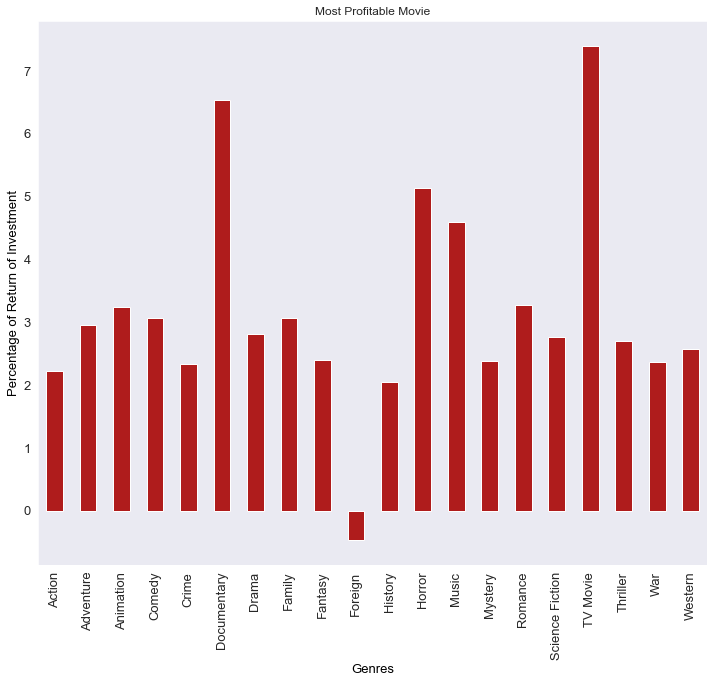

In [126]:
# Plot bar chart for roi of all genres
genplt = gen_roi['roi'].plot.bar(color = '#af1c1c', fontsize = 13)
genplt.set(title = 'Most Profitable Movie')
genplt.set_ylabel('Percentage of Return of Investment', color = 'black', fontsize = '13')
genplt.set_xlabel('Genres', color = 'black', fontsize = '13')
genplt.figure.set_size_inches(12,10)
plt.show()

>We can get the top five profitable movie as: **TV Movie**, **Documentary**, **Horror**, **Music**, **Romance**.

### Research Question 2  (Does higher vote mean more profit?)

> First, I need to create a dateframe for all votes and rois.

In [127]:
# create a temporary dataframe called vote including vote average and roi column using filter
vote = new_df.filter(['vote_average','roi'], axis=1)
# take view at this dataset
vote.head()

,vote_average,roi
0,6.5,9.090192
1,7.1,1.522909
2,6.3,1.683984
3,7.5,9.340891
4,7.3,6.927628


[Text(0, 0.5, 'Return On Investment'),
 Text(0.5, 0, 'Rating'),
 Text(0.5, 1.0, 'Rating and Profits')]

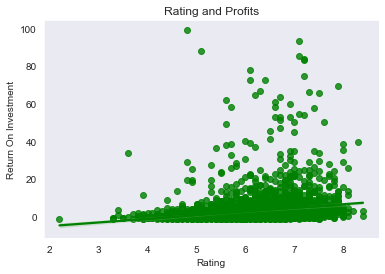

In [128]:
# import Seaborn and plot a scatterplot with regression line
import seaborn as sns
sns.set_style('dark')
sns.regplot(x='vote_average',y='roi',data=vote,fit_reg=True,color = 'green').set(title='Rating and Profits', xlabel="Rating", ylabel='Return On Investment')

>As the regression line shows: Movies of the higher rating tend to receive higher profits, but the correlation is weak.

### Research Question 3  (Discover trends of the movie industry over time)

> In this question, I will collect all quantitative trends related to the movies over time.

In [129]:
# create a dataframe named year_df using groupby
year_df = new_df.groupby('release_year').mean()
# add year as a column using index
year_df['year'] = year_df.index
# take a look at the dataframe
year_df

,budget,revenue,runtime,vote_average,budget_adj,revenue_adj,roi,year
release_year,,,,,,,,
1960,4.161390e+06,2.580100e+07,130.000000,7.400000,3.068179e+07,1.902299e+08,10.561618,1960
1961,3.863700e+06,3.377202e+07,132.500000,6.620000,2.818516e+07,2.463622e+08,7.984567,1961
1962,5.635714e+06,2.947569e+07,141.285714,6.900000,4.062476e+07,2.124740e+08,10.059508,1962
1963,1.018583e+07,2.942115e+07,153.500000,6.766667,7.252496e+07,2.094838e+08,6.197303,1963
1964,4.847880e+06,4.694479e+07,122.428571,6.971429,3.408189e+07,3.300344e+08,9.212943,1964
1965,1.176000e+07,9.161637e+07,167.600000,6.540000,8.138583e+07,6.340369e+08,8.333700,1965
1966,6.453600e+06,1.694734e+07,132.200000,6.880000,4.335538e+07,1.138525e+08,1.826751,1966
1967,7.346154e+06,5.629497e+07,118.384615,6.669231,4.802007e+07,3.679869e+08,12.127726,1967
1968,5.994444e+06,2.469131e+07,130.777778,6.655556,3.757895e+07,1.547889e+08,3.358364,1968


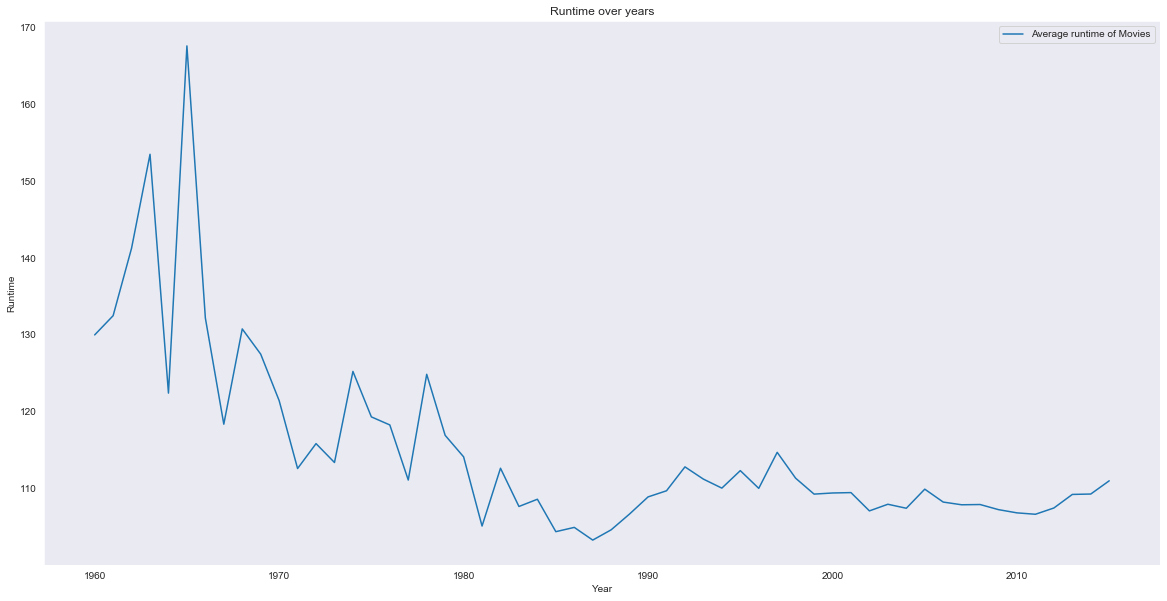

In [130]:
# make a line plot for year and runtime
year_df.plot(x='year', y='runtime', kind='line', figsize=(20,10), title="Runtime over years", label="Average runtime of Movies", )
plt.xlabel('Year')
plt.ylabel('Runtime');

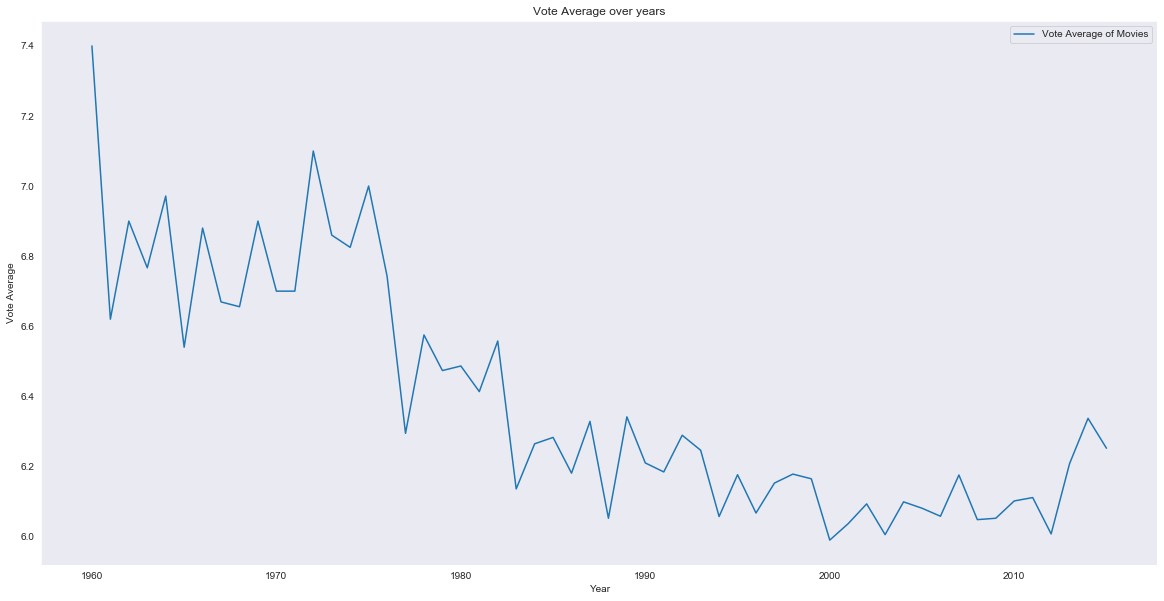

In [131]:
# make a line plot for year and rating
year_df.plot(x='year', y='vote_average', kind='line', figsize=(20,10), title="Vote Average over years", label="Vote Average of Movies", )
plt.xlabel('Year')
plt.ylabel('Vote Average');

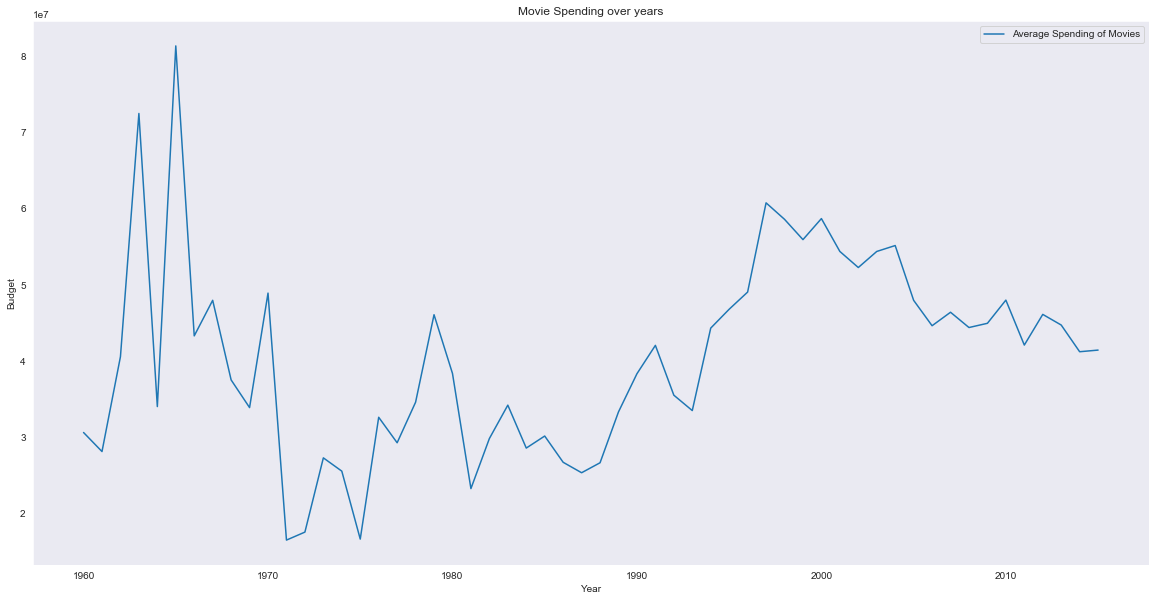

In [132]:
# make a line plot for year and budget(adjusted)
year_df.plot(x='year', y='budget_adj', kind='line', figsize=(20,10), title="Movie Spending over years", label="Average Spending of Movies", )
plt.xlabel('Year')
plt.ylabel('Budget');

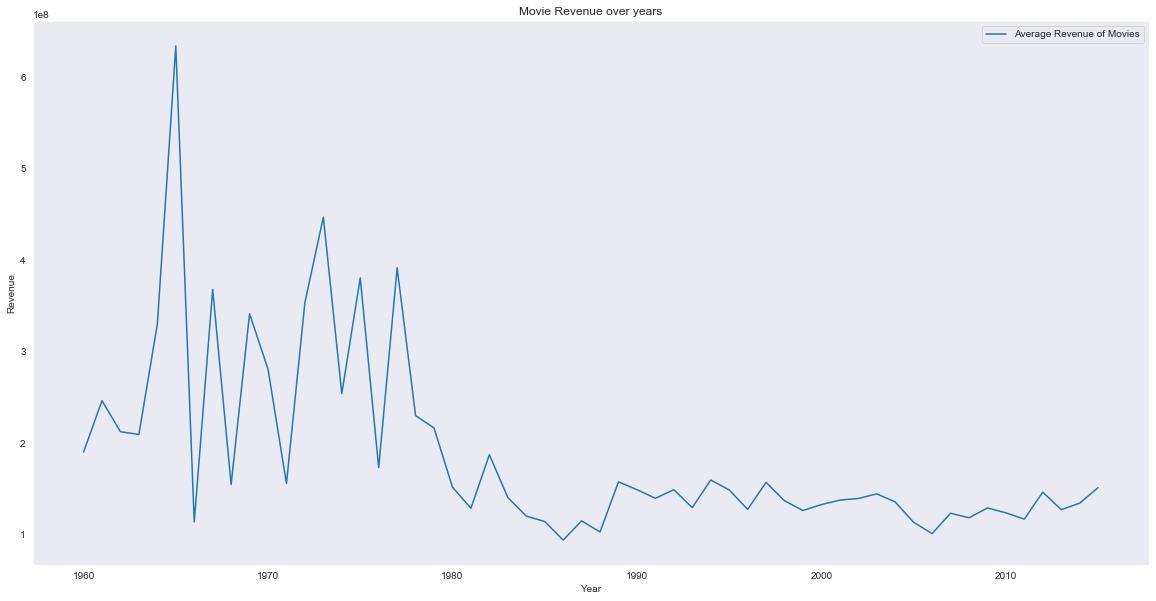

In [133]:
# make a line plot for year and revenue(adjusted)
year_df.plot(x='year', y='revenue_adj', kind='line', figsize=(20,10), title="Movie Revenue over years", label="Average Revenue of Movies", )
plt.xlabel('Year')
plt.ylabel('Revenue');

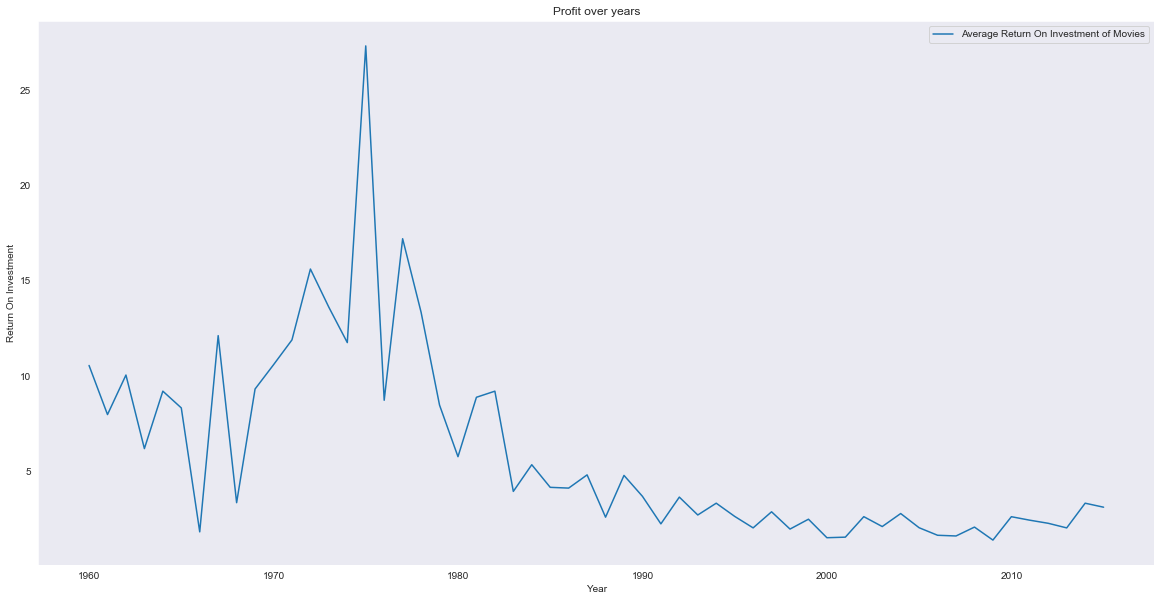

In [134]:
# make a line plot for year and profits
year_df.plot(x='year', y='roi', kind='line', figsize=(20,10), title="Profit over years", label="Average Return On Investment of Movies", )
plt.xlabel('Year')
plt.ylabel('Return On Investment');

>**Runtime:** Decreased from more than two hours in last century, to less than two hours in 21st century.
<br>
**Rating:** Decreased from above 7/10 in 1960s, to little above 6/10 around 2015.
<br>
**Budget:** Fluctuates year from year, depending on several blockbusters. As we see more big names in recent year, there less fluction on yearly average. The average budget for the 2010s is around 50M.
<br>
**Revenue:** Decreased from last century to a little bit over 10M.
<br>
**Profit:** Decreased from last century to around 2-3 times return on investment.


### Research Question 4  (Compare movies with top budget with top revenue)

>In this section, I am going to compare movies with top budget with the top revenue ones to see the differeces.

In [135]:
# select the movies of the top 10 budget
top_budget = new_df.sort_values(by='budget_adj', ascending=False)
# display the dataframe
topb = top_budget.head(10)
topb

,budget,revenue,original_title,cast,director,runtime,production_companies,vote_average,release_year,budget_adj,revenue_adj,roi,genres1,genres2,genres3,genres4,genres5
2244,425000000.0,1.108757e+07,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Boram Entertainment Inc.,6.4,2010,4.250000e+08,1.108757e+07,-0.973912,Adventure,Fantasy,Action,Western,Thriller
3375,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136.0,Walt Disney Pictures|Jerry Bruckheimer Films|M...,6.3,2011,3.683713e+08,9.904175e+08,1.688639,Adventure,Action,Fantasy,None,None
7387,300000000.0,9.610000e+08,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169.0,Walt Disney Pictures|Jerry Bruckheimer Films|S...,6.8,2007,3.155006e+08,1.010654e+09,2.203333,Adventure,Fantasy,Action,None,None
6570,270000000.0,3.910812e+08,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154.0,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,5.3,2006,2.920507e+08,4.230205e+08,0.448449,Adventure,Fantasy,Action,Science Fiction,None
5231,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Paramount Pictures|Twentieth Century Fox Film ...,7.3,1997,2.716921e+08,2.506406e+09,8.225171,Drama,Romance,Thriller,None,None
7394,258000000.0,8.908716e+08,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,Sam Raimi,139.0,Columbia Pictures|Laura Ziskin Productions|Mar...,5.8,2007,2.713305e+08,9.369017e+08,2.452991,Fantasy,Action,Adventure,None,None
1929,260000000.0,5.917949e+08,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,100.0,Walt Disney Pictures|Walt Disney Animation Stu...,7.3,2010,2.600000e+08,5.917949e+08,1.276134,Animation,Family,None,None,None
14,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141.0,Marvel Studios|Prime Focus|Revolution Sun Studios,7.4,2015,2.575999e+08,1.292632e+09,4.017985,Action,Adventure,Science Fiction,None,None
1389,250000000.0,9.339592e+08,Harry Potter and the Half-Blood Prince,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom ...,David Yates,153.0,Warner Bros.|Heyday Films,7.3,2009,2.541001e+08,9.492765e+08,2.735837,Adventure,Fantasy,Family,None,None
8089,175000000.0,2.642182e+08,Waterworld,Kevin Costner|Chaim Girafi|Rick Aviles|R. D. C...,Kevin Reynolds,135.0,Universal Pictures|Gordon Company|Davis Entert...,5.8,1995,2.504192e+08,3.780875e+08,0.509818,Adventure,Action,None,None,None


In [136]:
# get the average the the movies of the top budget
topb.mean()

budget          2.798000e+08
revenue         8.315766e+08
runtime         1.421000e+02
vote_average    6.570000e+00
release_year    2.006700e+03
budget_adj      2.966064e+08
revenue_adj     9.090278e+08
roi             2.258445e+00
dtype: float64

In [137]:
# select the movies of the top 10 revenue
top_revenue = new_df.sort_values(by='revenue_adj', ascending=False)
# display the dataframe
topr = top_revenue.head(10)
topr

,budget,revenue,original_title,cast,director,runtime,production_companies,vote_average,release_year,budget_adj,revenue_adj,roi,genres1,genres2,genres3,genres4,genres5
1386,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,2.408869e+08,2.827124e+09,10.736312,Action,Adventure,Fantasy,Science Fiction,None
1329,11000000.0,7.753980e+08,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Lucasfilm|Twentieth Century Fox Film Corporation,7.9,1977,3.957559e+07,2.789712e+09,69.490728,Adventure,Action,Science Fiction,None,None
5231,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Paramount Pictures|Twentieth Century Fox Film ...,7.3,1997,2.716921e+08,2.506406e+09,8.225171,Drama,Romance,Thriller,None,None
10594,8000000.0,4.413061e+08,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122.0,Warner Bros.|Hoya Productions,7.2,1973,3.928928e+07,2.167325e+09,54.163268,Drama,Horror,Thriller,None,None
9806,7000000.0,4.706540e+08,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124.0,Universal Pictures|Zanuck/Brown Productions,7.3,1975,2.836275e+07,1.907006e+09,66.236286,Horror,Thriller,Adventure,None,None
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09,9.340891,Action,Adventure,Science Fiction,Fantasy,None
8889,10500000.0,7.929106e+08,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,115.0,Universal Pictures|Amblin Entertainment,7.2,1982,2.372625e+07,1.791694e+09,74.515291,Science Fiction,Adventure,Family,Fantasy,None
8094,22000000.0,1.106280e+09,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114.0,Columbia Pictures,5.6,1995,3.148127e+07,1.583050e+09,49.285439,Crime,Drama,Mystery,Thriller,Action
10110,4000000.0,2.158800e+08,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79.0,Walt Disney Productions,6.6,1961,2.917944e+07,1.574815e+09,52.970003,Adventure,Animation,Comedy,Family,None
4361,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143.0,Marvel Studios,7.3,2012,2.089437e+08,1.443191e+09,5.907081,Science Fiction,Action,Adventure,None,None


In [138]:
# get the average the the movies of the top revenue
topr.mean()

budget          9.195000e+07
revenue         1.201670e+09
runtime         1.310000e+02
vote_average    7.100000e+00
release_year    1.989600e+03
budget_adj      1.097137e+08
revenue_adj     2.049305e+09
roi             4.008705e+01
dtype: float64

>Top budget movies are gennerally **longer in runtime** but **lower rating and profits** than movies with top revenue. Top revenue movies are also **associate to more genres**.

<a id='conclusions'></a>
## Conclusions


> There are many limitations to the data analysis process. For example, I clean up the outliers with higher than 100 or less than -100 return on investment. I do not make any research on that but I believe these movies do not reflect the trend. But it can be mistakes in the top budget/revenue collection.
<br>
The other limitations is my code are not smart enough a larger dataset. For example, spilting and appending the genres.

>**Findings**<br>
<li>TV and Documentation are genres with the highest profits. This could be coming from the viewers of TV channels.</li>
<li>A good movie generally sells better, but not 100%.</li>
<li>Movies are getting shorter, receieving less budget, revenue ,and less profitable. Moreover, it is getting worse a little bit in average. </li>
<li> A blockbuster sells good has better evaluation, and more profitable.</li>

> Sites I referred to:<br>
https://gist.github.com/jlln/338b4b0b55bd6984f883
<br>
https://github.com/igorstojanovic91/udacity-investigate-a-dataset/blob/master/investigate-a-dataset-template.ipynb